### Test regridding styles

This notebook is just a sanity check to see the influence of using NCAR style curvilinear interpolation https://climatedataguide.ucar.edu/climate-tools/regridding-overview from using https://xesmf.readthedocs.io/en/latest/ and xarrays native `dataset.interp` function which I understand is performed on a flat surface without accounting for the surface of the Earth.

The results shown here are basically that at worst, we're looking a sub-millimeter deviation a MAX. This is well within margins, obviously. :)

In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using xarray.Dataset.interp
before_era_path = "/home/nannau/gom/era5_full_old.zarr"
before_wrf_path = "/home/nannau/gom/wrf_full_old.zarr"

erab = xr.open_zarr(before_era_path)
wrfb = xr.open_zarr(before_wrf_path)

In [3]:
# Created with xe.Regridder xESMF project
era_path = "/home/nannau/gom/era5_full.zarr"
wrf_path = "/home/nannau/gom/wrf_full.zarr"

wrf = xr.open_zarr(wrf_path)
era = xr.open_zarr(era_path)

erax = era.sel(time=slice("20001001T01:00:00", "20001101T23:00:00"), drop=True)

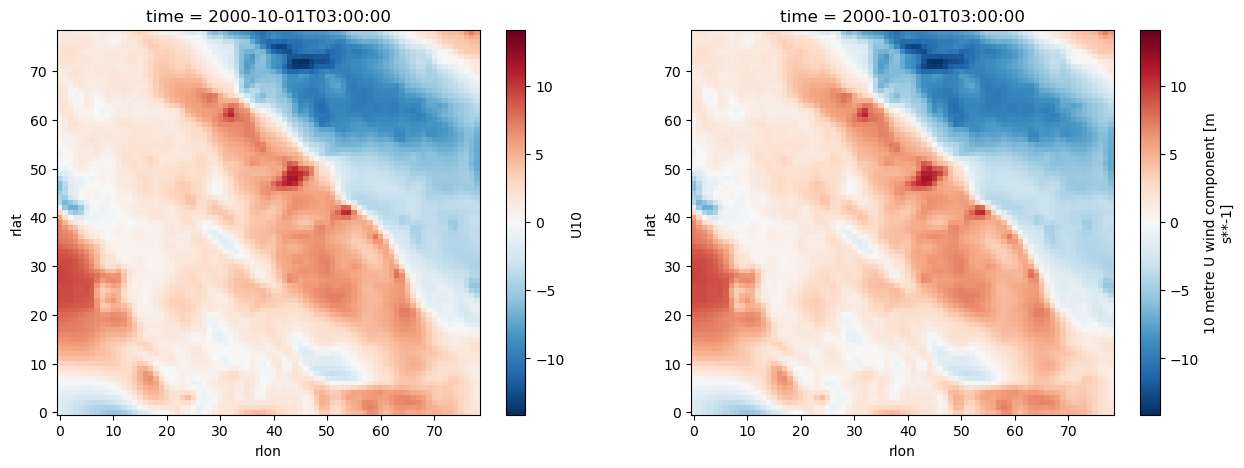

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
erax.U10[2, ...].plot(ax=ax[0])
erab.U10[2, ...].plot(ax=ax[1])

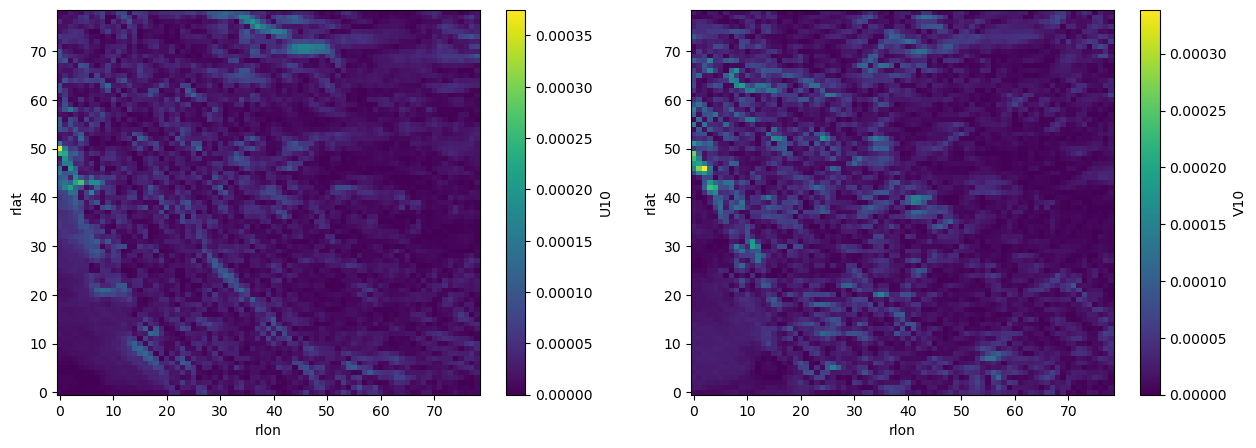

In [15]:
# Plot the difference
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
np.abs(erax.U10.mean(axis=0) - erab.U10.mean(axis=0)).plot(ax=ax[0])
np.abs(erax.V10.mean(axis=0) - erab.V10.mean(axis=0)).plot(ax=ax[1])